# This notebook contains initial EDA (and 1st round classification) of the Yummly dataset. 
## Author: Aaron W Chen

In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
train_data_path = '../data/raw/train.json'
data = pd.read_json(train_data_path)
data.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
data.groupby('cuisine').count()

,id,ingredients
cuisine,,
brazilian,467,467
british,804,804
cajun_creole,1546,1546
chinese,2673,2673
filipino,755,755
french,2646,2646
greek,1175,1175
indian,3003,3003
irish,667,667


In [4]:
targets = data.cuisine
targets

0              greek
1        southern_us
2           filipino
3             indian
4             indian
            ...     
39769          irish
39770        italian
39771          irish
39772        chinese
39773        mexican
Name: cuisine, Length: 39774, dtype: object

In [5]:
recipes = data.ingredients
recipes

0        [romaine lettuce, black olives, grape tomatoes...
1        [plain flour, ground pepper, salt, tomatoes, g...
2        [eggs, pepper, salt, mayonaise, cooking oil, g...
3                      [water, vegetable oil, wheat, salt]
4        [black pepper, shallots, cornflour, cayenne pe...
                               ...                        
39769    [light brown sugar, granulated sugar, butter, ...
39770    [KRAFT Zesty Italian Dressing, purple onion, b...
39771    [eggs, citrus fruit, raisins, sourdough starte...
39772    [boneless chicken skinless thigh, minced garli...
39773    [green chile, jalapeno chilies, onions, ground...
Name: ingredients, Length: 39774, dtype: object

In [6]:
skf = StratifiedKFold(n_splits=3)
for train_index, val_index in skf.split(recipes, targets):
    recipes_train, recipes_val = recipes[train_index], recipes[val_index]
    targets_train, targets_val = targets[train_index], targets[val_index]

In [7]:
le = LabelEncoder()
le.fit(targets_train)

LabelEncoder()

In [8]:
le.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [9]:
transformed_targets_train = le.transform(targets_train)

In [54]:
transformed_targets_train

array([ 6, 16,  4, ...,  2,  2,  2])

In [55]:
le.inverse_transform(transformed_targets_train)

array(['greek', 'southern_us', 'filipino', ..., 'cajun_creole',
       'cajun_creole', 'cajun_creole'], dtype=object)

In [10]:
all_words = [ item for elem in recipes_train for item in elem]

In [11]:
all_words[:5], len(all_words)

(['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper'],
 285089)

In [12]:
recipes_train

0        [romaine lettuce, black olives, grape tomatoes...
1        [plain flour, ground pepper, salt, tomatoes, g...
2        [eggs, pepper, salt, mayonaise, cooking oil, g...
3                      [water, vegetable oil, wheat, salt]
4        [black pepper, shallots, cornflour, cayenne pe...
                               ...                        
26906    [milk, baking powder, all-purpose flour, sugar...
26954    [worcestershire sauce, celery, ground black pe...
26960    [garlic, fresh parsley, chicken stock, long gr...
26969    [green chile, seasoning salt, diced tomatoes, ...
26982    [Johnsonville Smoked Sausage, water, stewed to...
Name: ingredients, Length: 26516, dtype: object

In [13]:
tfidf_vec_unigram = TfidfVectorizer(token_pattern=r"(?u)\b[a-zA-Z]{2,}\b")

In [14]:
x = tfidf_vec_unigram.fit(all_words)

In [15]:
x

TfidfVectorizer(token_pattern='(?u)\\b[a-zA-Z]{2,}\\b')

In [16]:
recipes_train_uni_vec = tfidf_vec_unigram.transform(recipes_train.apply(" ".join).str.lower())
word_matrix = pd.DataFrame(recipes_train_uni_vec.toarray(), 
                            columns=tfidf_vec_unigram.get_feature_names(), 
                            index=recipes_train.index
                        )

In [17]:
word_matrix

,abalone,abbamele,absinthe,abura,acai,accent,accompaniment,achiote,acid,acini,...,yuzu,yuzukosho,za,zatarain,zero,zest,zesty,zinfandel,ziti,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.231513,0.0,0.0,0.0,0.0
26954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
26960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
26969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [18]:
word_matrix.columns[201:220]

Index(['biga', 'bihon', 'bing', 'bird', 'biryani', 'biscotti', 'biscuit',
       'biscuits', 'bison', 'bisquick', 'bits', 'bitter', 'bitters',
       'bittersweet', 'blacan', 'black', 'blackberries', 'blackberry',
       'blackcurrant'],
      dtype='object')

In [19]:
word_matrix.iloc[0]

abalone      0.0
abbamele     0.0
absinthe     0.0
abura        0.0
acai         0.0
            ... 
zest         0.0
zesty        0.0
zinfandel    0.0
ziti         0.0
zucchini     0.0
Name: 0, Length: 2771, dtype: float64

In [20]:
word_matrix.iloc[0][word_matrix.iloc[0] > 0]

beans        0.224367
black        0.181163
cheese       0.178052
crumbles     0.311264
feta         0.291110
garbanzo     0.343606
garlic       0.159290
grape        0.321816
lettuce      0.266857
olives       0.260341
onion        0.198533
pepper       0.147376
purple       0.248575
romaine      0.317171
seasoning    0.240609
tomatoes     0.189996
Name: 0, dtype: float64

In [21]:
recipes_train.iloc[0]

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [22]:
lr_uni_tfidf_ovr = LogisticRegression(multi_class = 'ovr',
                                      class_weight = 'balanced',
                                      #solver = 'liblinear',
                                      max_iter = 1000,
                                      random_state = 50)
lr_uni_tfidf_ovr.fit(word_matrix, targets_train)
train_pred_tfidf_uni_ovr = lr_uni_tfidf_ovr.predict(word_matrix)

In [23]:
def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

In [24]:
acc_lr_uni_tfidf_ovr, prec_lr_uni_tfidf_ovr, recall_lr_uni_tfidf_ovr, f1_lr_uni_tfidf_ovr = get_metrics(targets_train, train_pred_tfidf_uni_ovr)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (acc_lr_uni_tfidf_ovr, prec_lr_uni_tfidf_ovr, recall_lr_uni_tfidf_ovr, f1_lr_uni_tfidf_ovr))

accuracy = 0.816, precision = 0.830, recall = 0.816, f1 = 0.820


In [25]:
reci_val_uni_vec = tfidf_vec_unigram.transform(recipes_val.apply(" ".join).str.lower())
word_matrix_val = pd.DataFrame(reci_val_uni_vec.toarray(), 
                            columns=tfidf_vec_unigram.get_feature_names(), 
                            index=recipes_val.index
                        )

In [26]:
val_pred_tfidf_uni_ovr = lr_uni_tfidf_ovr.predict(word_matrix_val)

In [27]:
val_acc_lr_uni_tfidf_ovr, val_prec_lr_uni_tfidf_ovr, val_recall_lr_uni_tfidf_ovr, val_f1_lr_uni_tfidf_ovr = get_metrics(targets_val, val_pred_tfidf_uni_ovr)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (val_acc_lr_uni_tfidf_ovr, val_prec_lr_uni_tfidf_ovr, val_recall_lr_uni_tfidf_ovr, val_f1_lr_uni_tfidf_ovr))

accuracy = 0.763, precision = 0.776, recall = 0.763, f1 = 0.768


In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

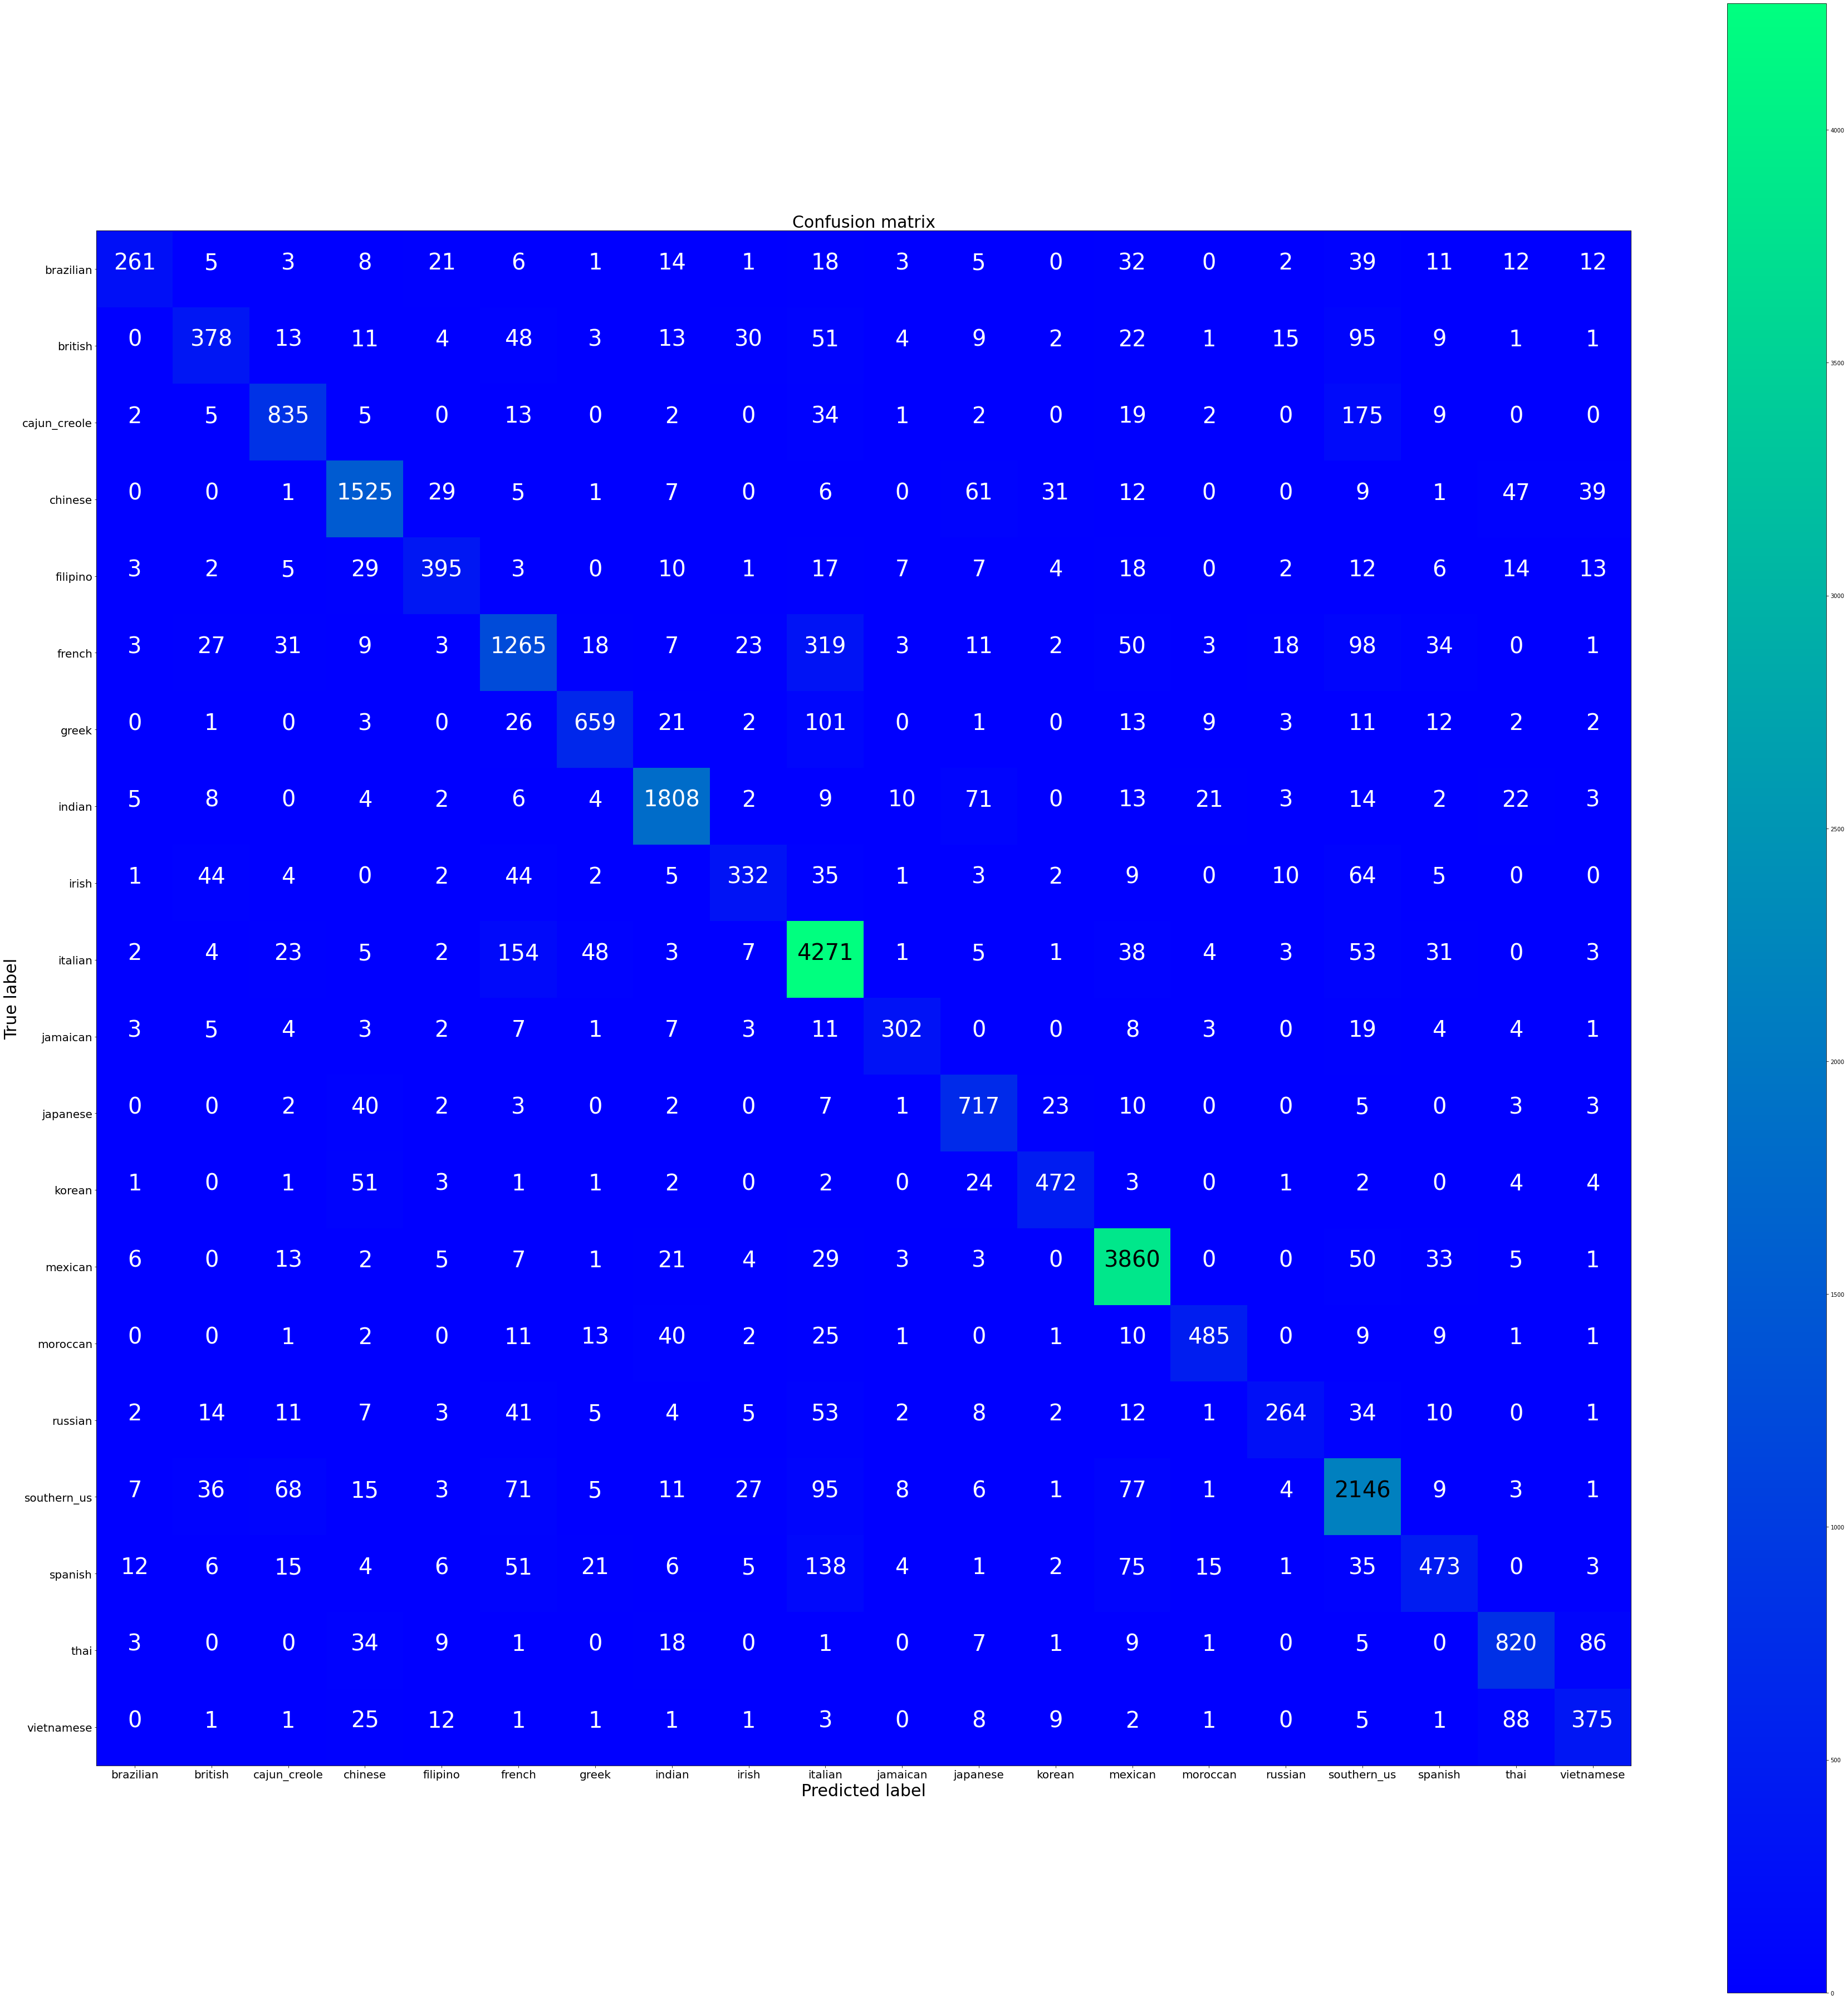

[[ 261    5    3    8   21    6    1   14    1   18    3    5    0   32
     0    2   39   11   12   12]
 [   0  378   13   11    4   48    3   13   30   51    4    9    2   22
     1   15   95    9    1    1]
 [   2    5  835    5    0   13    0    2    0   34    1    2    0   19
     2    0  175    9    0    0]
 [   0    0    1 1525   29    5    1    7    0    6    0   61   31   12
     0    0    9    1   47   39]
 [   3    2    5   29  395    3    0   10    1   17    7    7    4   18
     0    2   12    6   14   13]
 [   3   27   31    9    3 1265   18    7   23  319    3   11    2   50
     3   18   98   34    0    1]
 [   0    1    0    3    0   26  659   21    2  101    0    1    0   13
     9    3   11   12    2    2]
 [   5    8    0    4    2    6    4 1808    2    9   10   71    0   13
    21    3   14    2   22    3]
 [   1   44    4    0    2   44    2    5  332   35    1    3    2    9
     0   10   64    5    0    0]
 [   2    4   23    5    2  154   48    3    7 4271    

In [34]:
cm_train = confusion_matrix(train_pred_tfidf_uni_ovr, targets_train)
fig_train = plt.figure(figsize=(50, 50))
plot_train = plot_confusion_matrix(cm_train, classes=le.classes_, normalize=False, title='Confusion matrix')
plt.show()
print(cm_train)

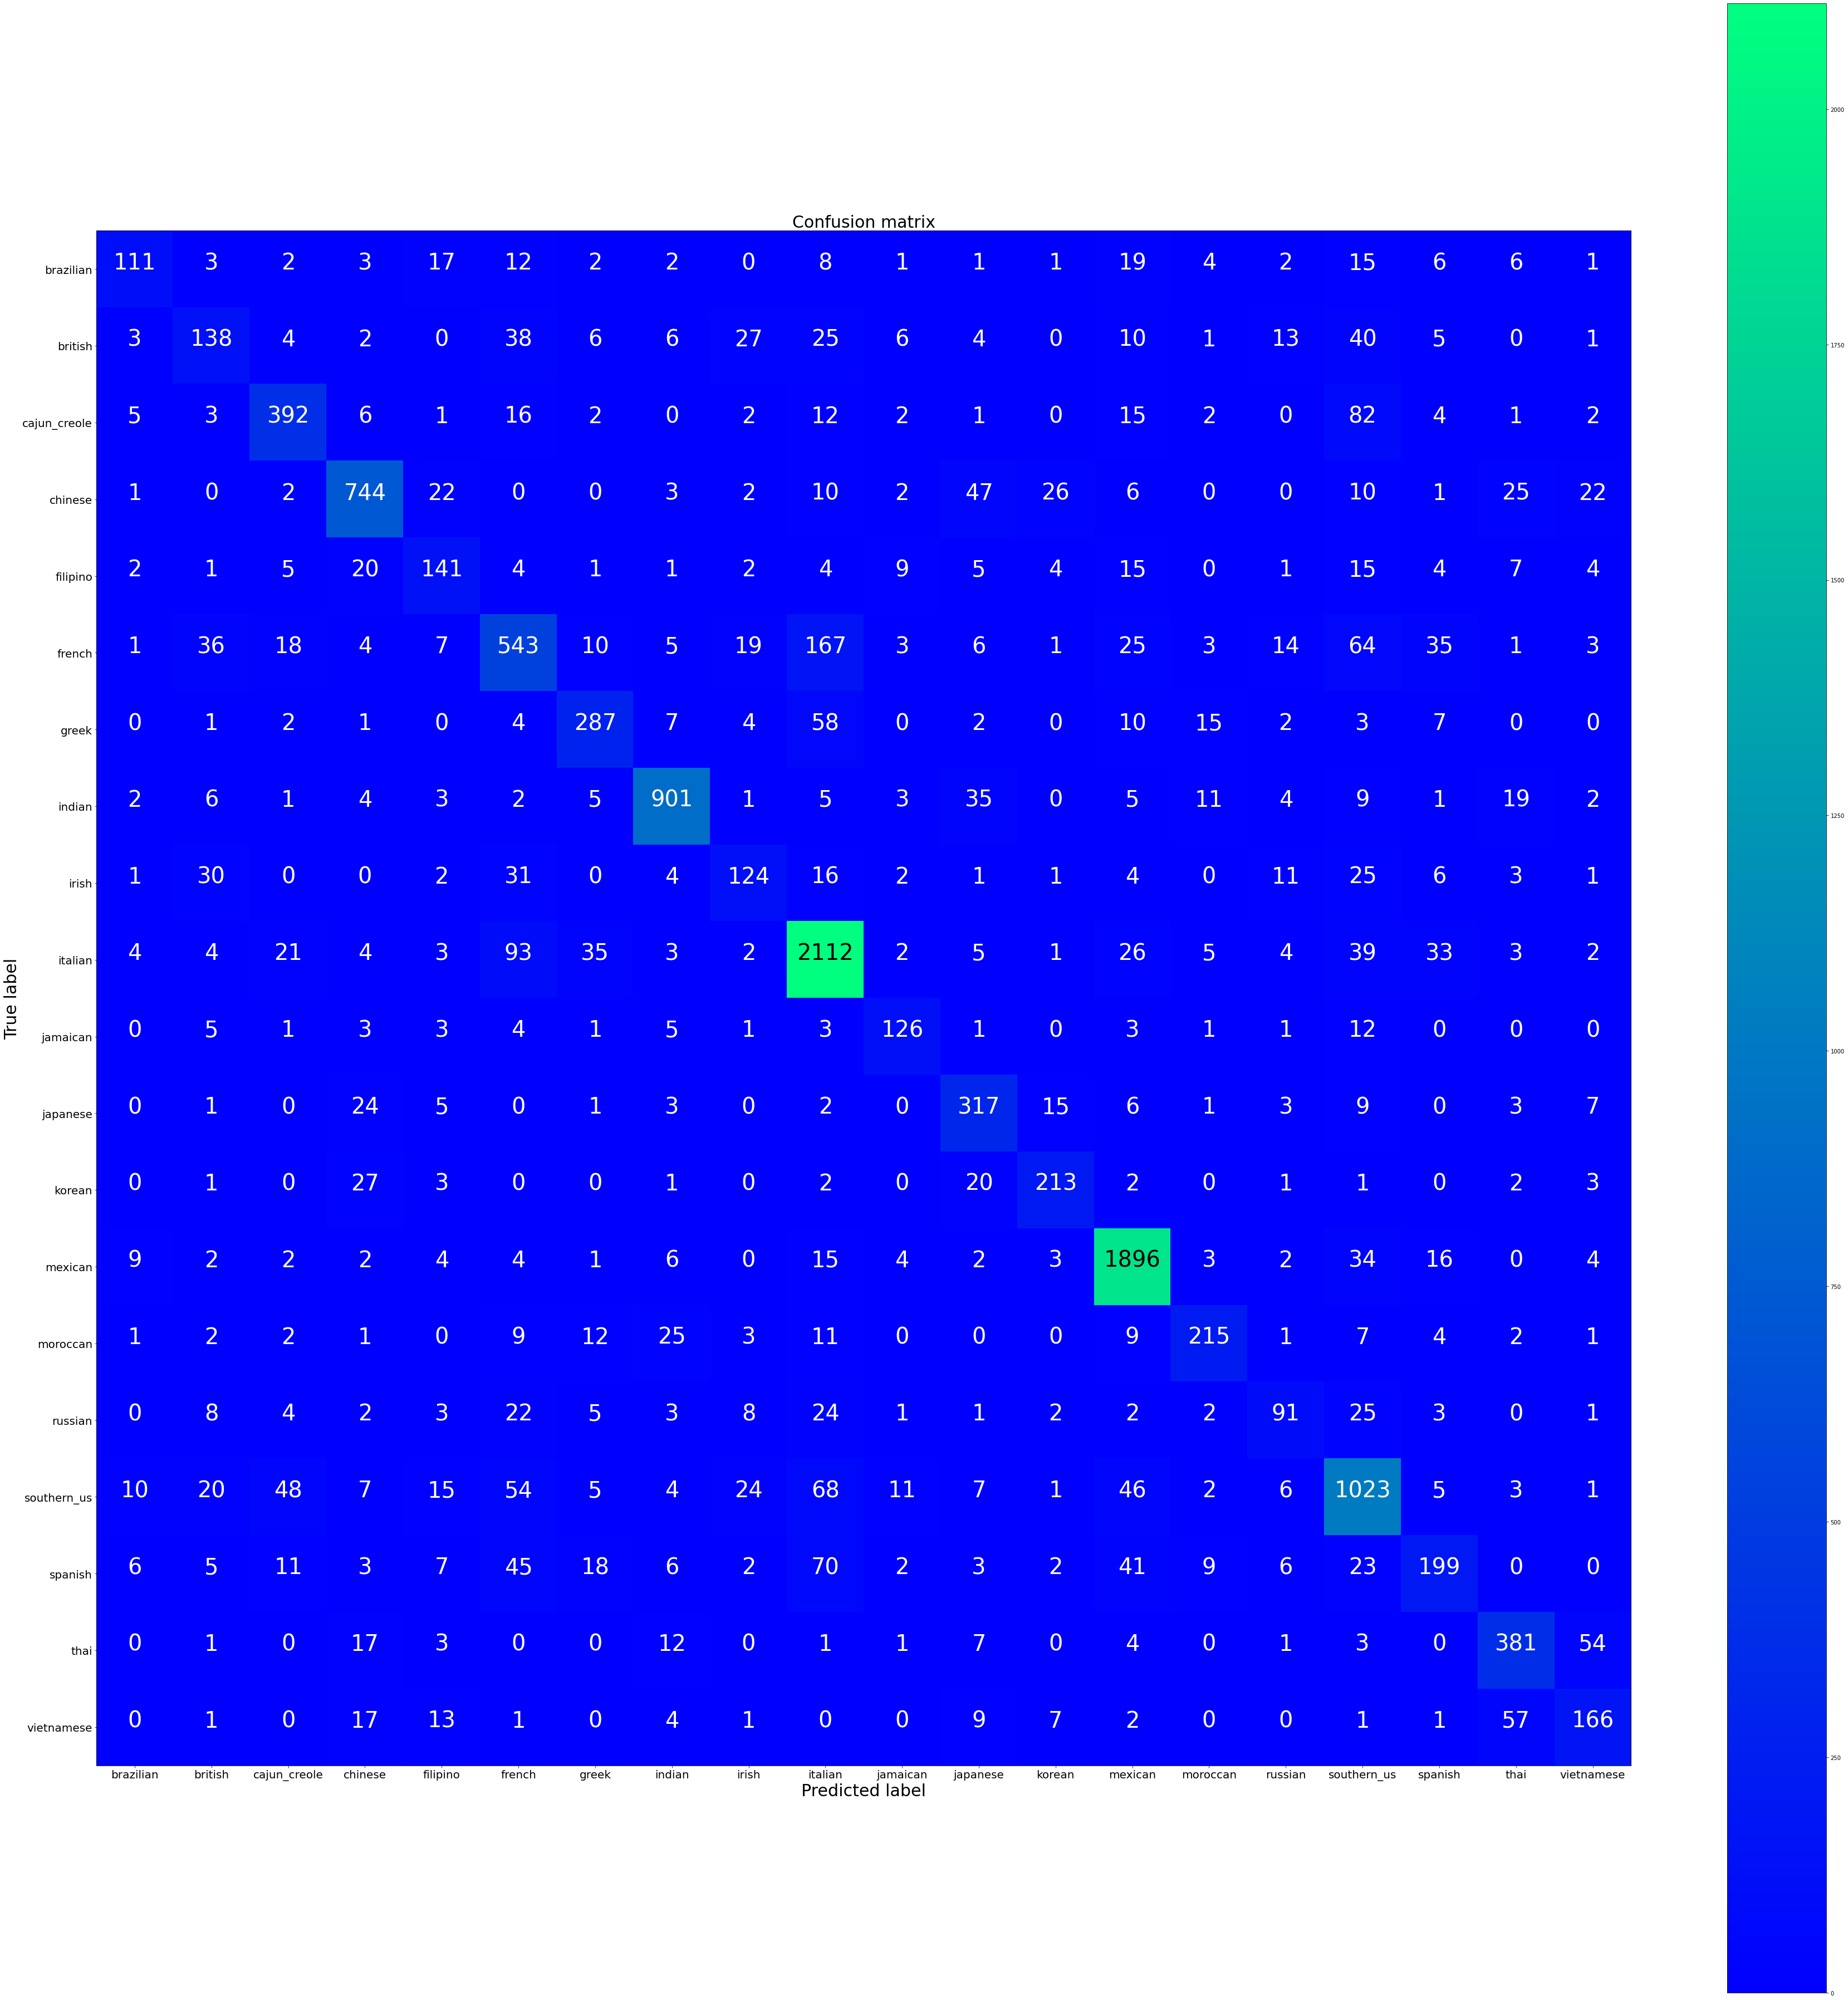

[[ 111    3    2    3   17   12    2    2    0    8    1    1    1   19
     4    2   15    6    6    1]
 [   3  138    4    2    0   38    6    6   27   25    6    4    0   10
     1   13   40    5    0    1]
 [   5    3  392    6    1   16    2    0    2   12    2    1    0   15
     2    0   82    4    1    2]
 [   1    0    2  744   22    0    0    3    2   10    2   47   26    6
     0    0   10    1   25   22]
 [   2    1    5   20  141    4    1    1    2    4    9    5    4   15
     0    1   15    4    7    4]
 [   1   36   18    4    7  543   10    5   19  167    3    6    1   25
     3   14   64   35    1    3]
 [   0    1    2    1    0    4  287    7    4   58    0    2    0   10
    15    2    3    7    0    0]
 [   2    6    1    4    3    2    5  901    1    5    3   35    0    5
    11    4    9    1   19    2]
 [   1   30    0    0    2   31    0    4  124   16    2    1    1    4
     0   11   25    6    3    1]
 [   4    4   21    4    3   93   35    3    2 2112    

In [35]:
cm_val = confusion_matrix(val_pred_tfidf_uni_ovr, targets_val)
fig_val = plt.figure(figsize=(50, 50))
plot_val = plot_confusion_matrix(cm_val, classes=le.classes_, normalize=False, title='Confusion matrix')
plt.show()
print(cm_val)

In [41]:
le.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [42]:
le.classes_[0]

'brazilian'

In [43]:
def get_most_important_features(vectorizer, model, encoder, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[le.classes_[class_index]] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

In [44]:
train_importance = get_most_important_features(tfidf_vec_unigram, lr_uni_tfidf_ovr, le, 10)

In [46]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Least Important', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Most Important', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

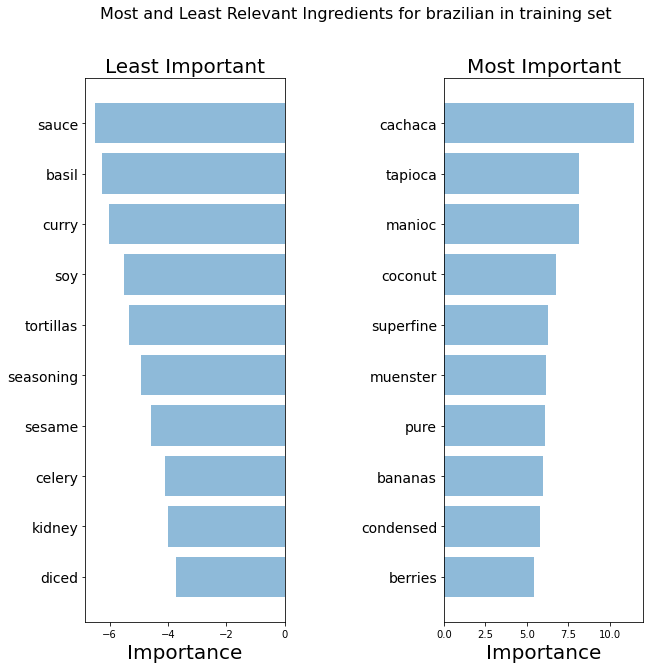

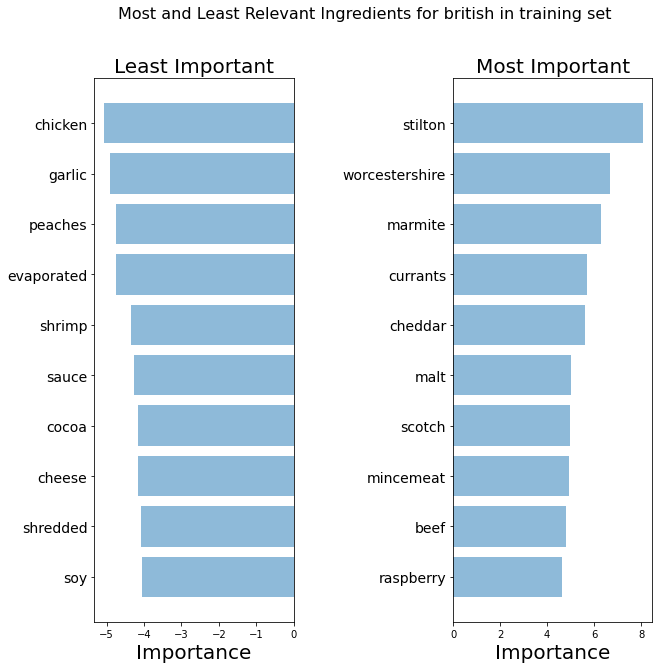

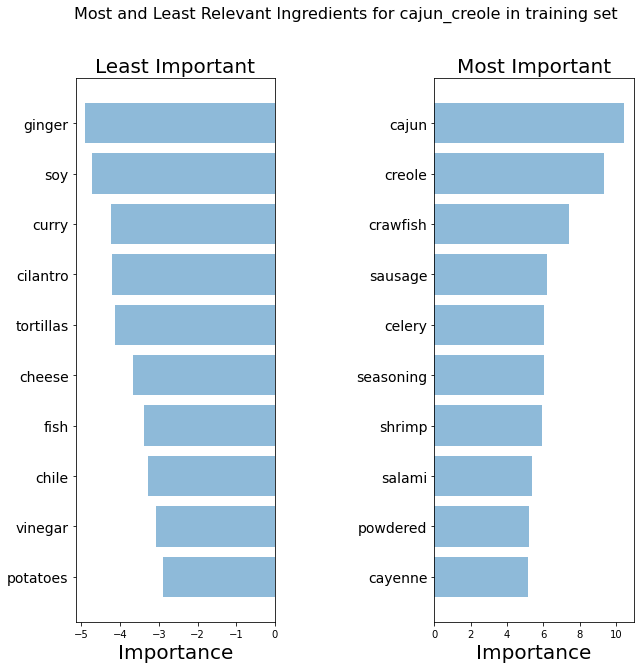

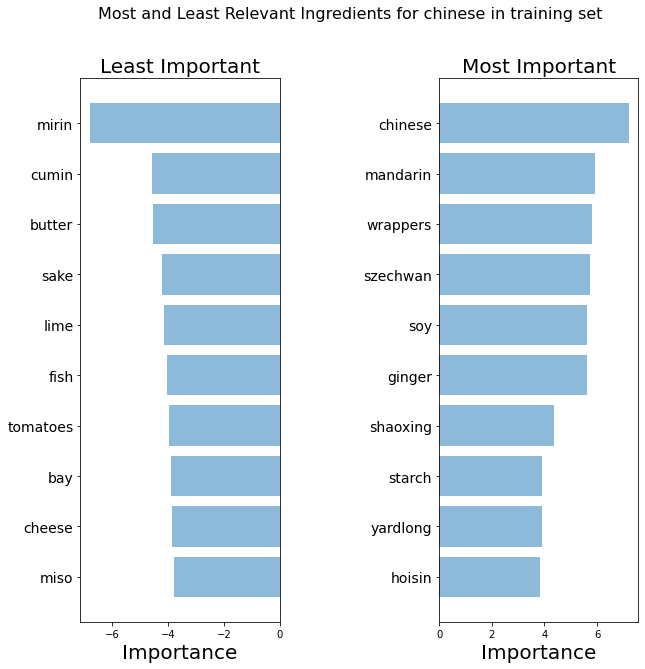

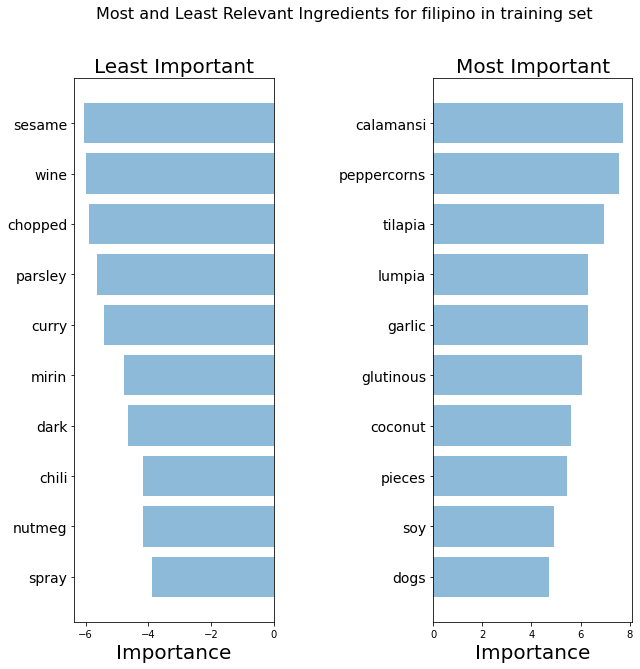

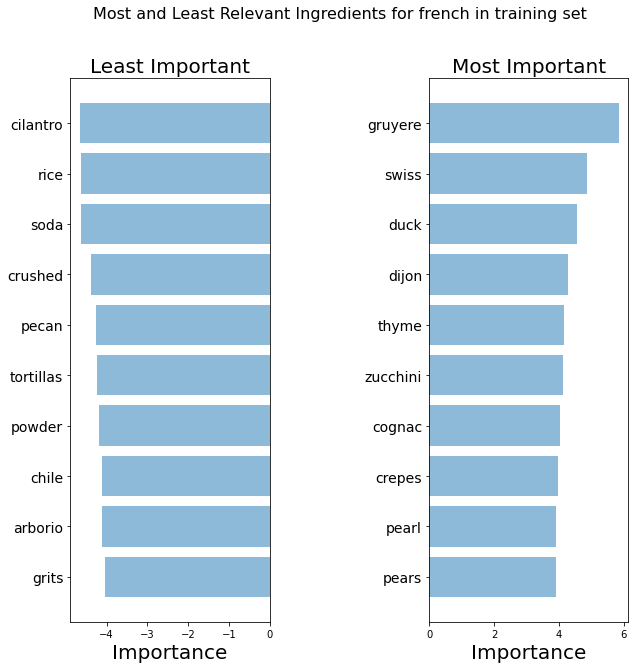

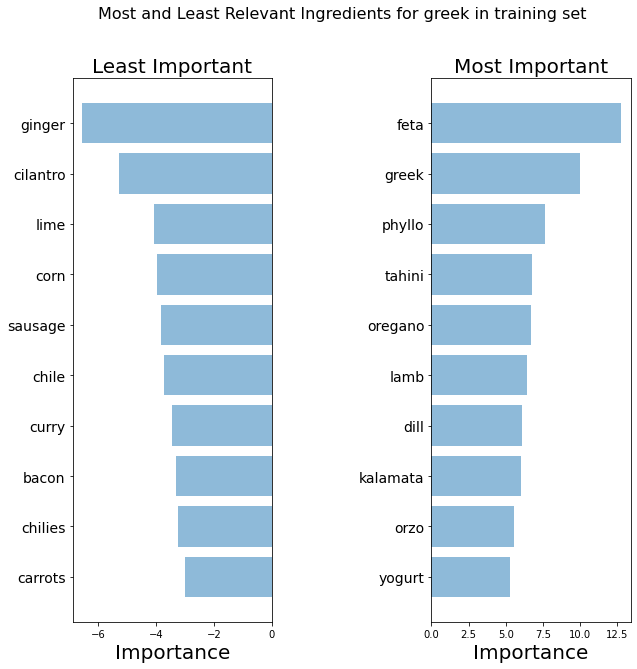

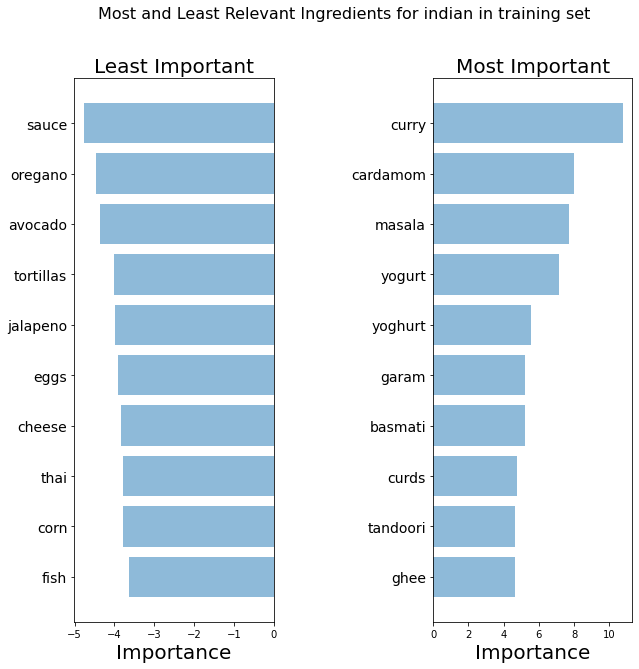

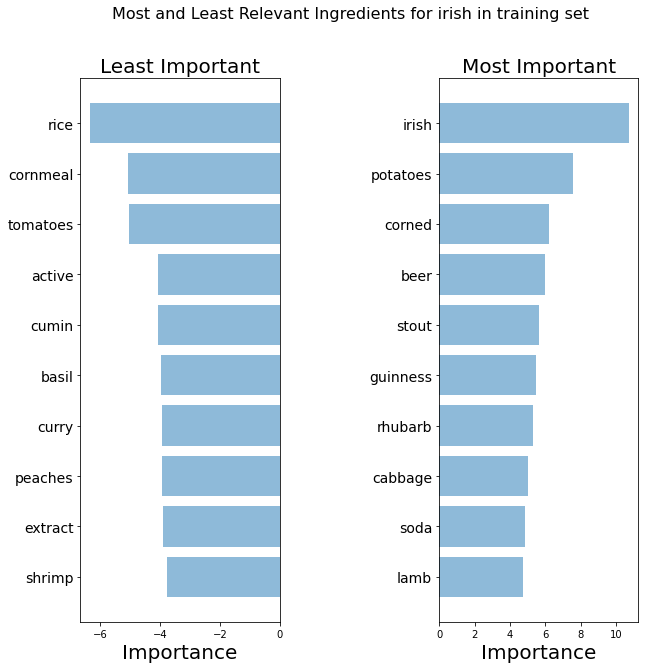

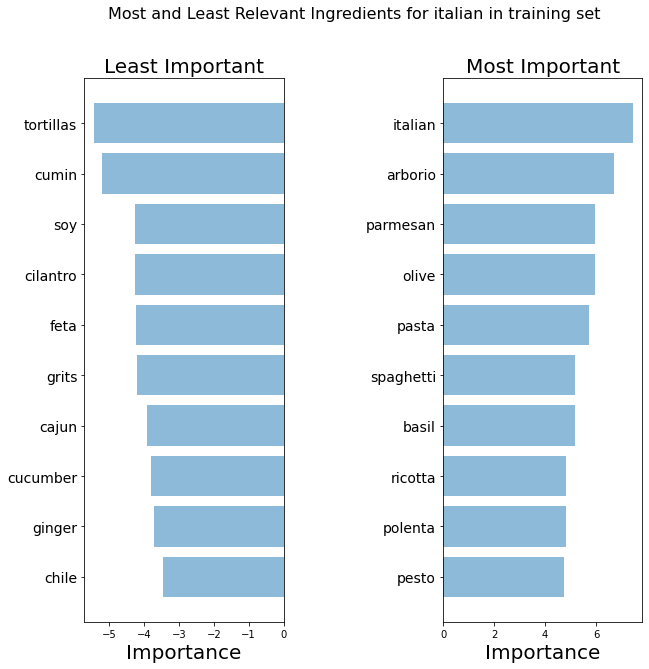

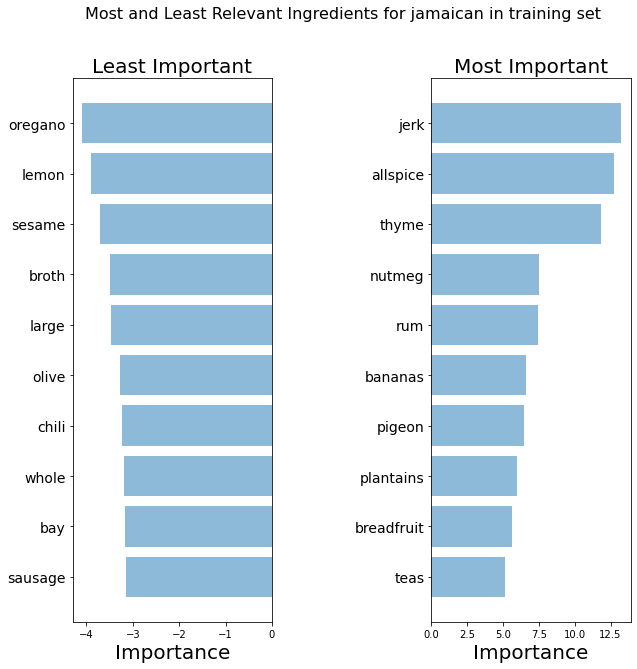

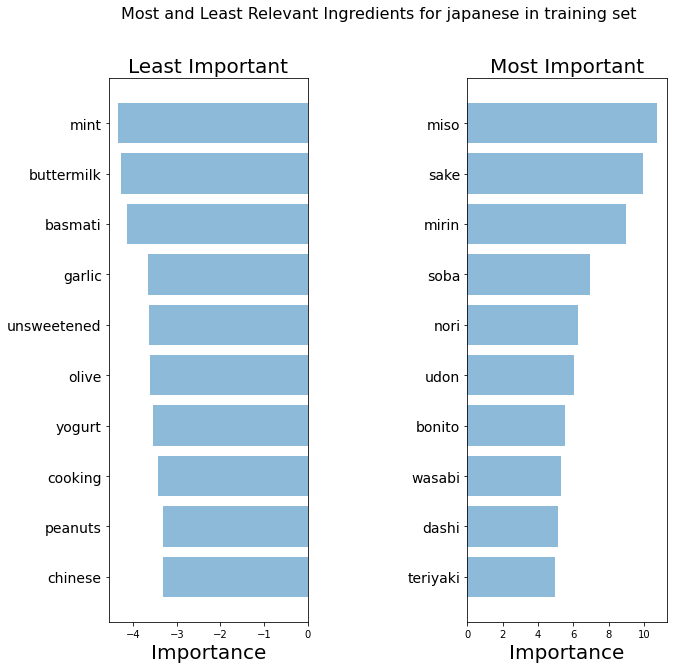

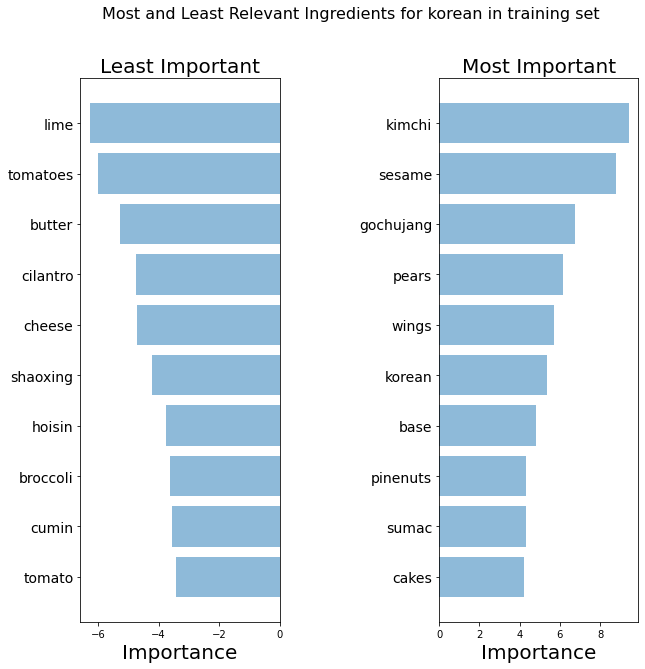

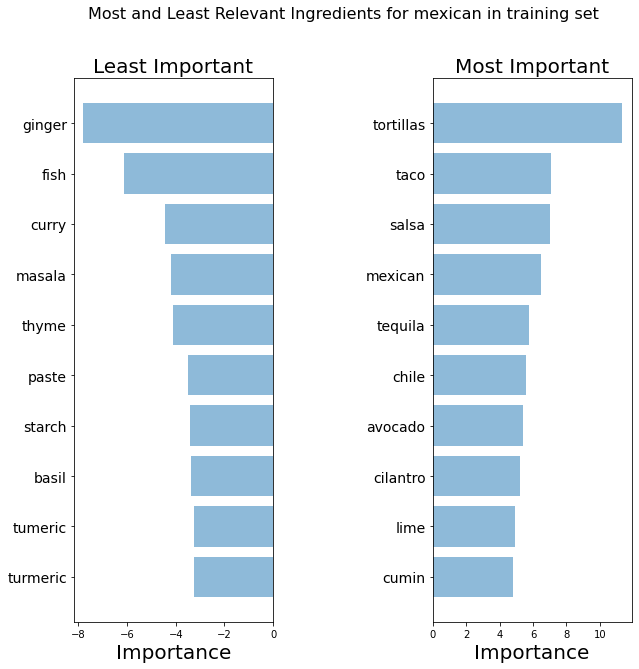

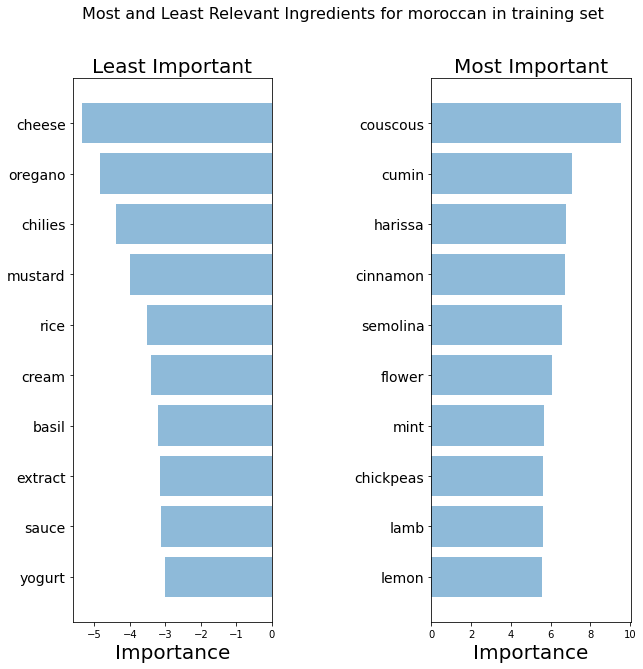

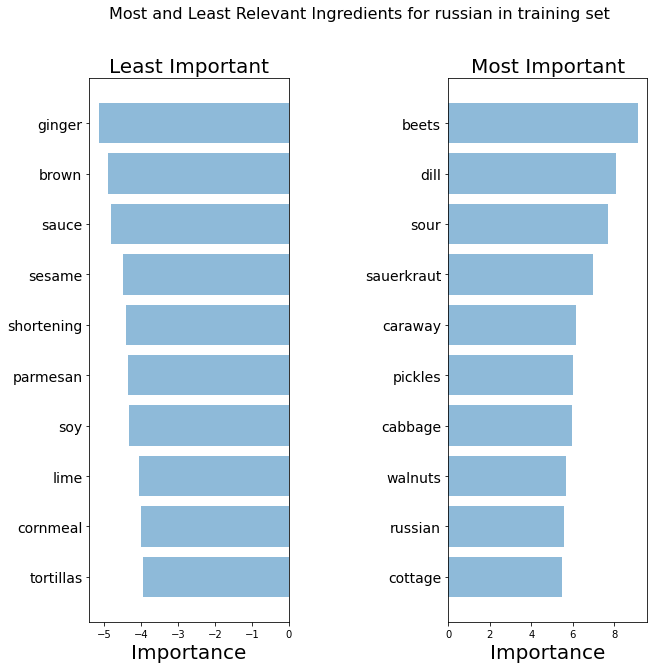

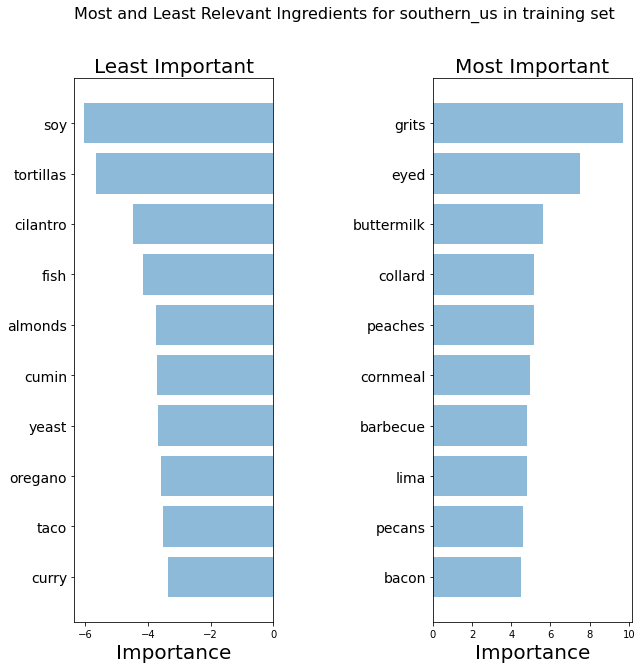

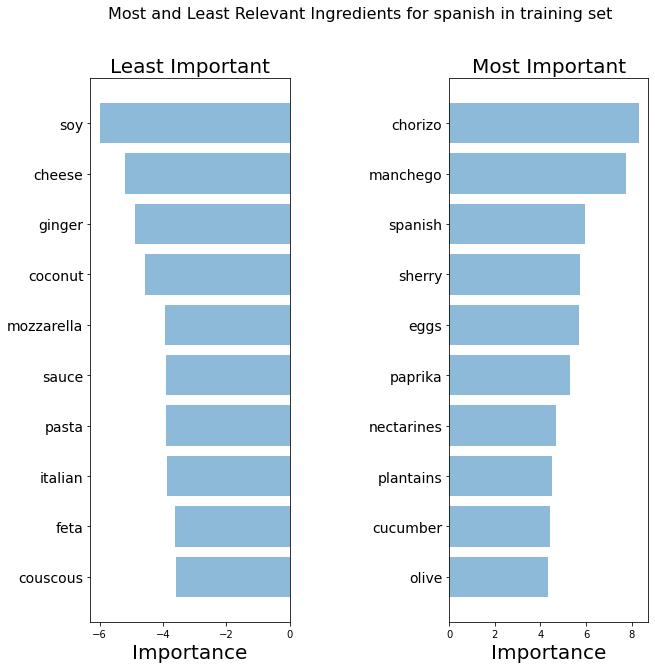

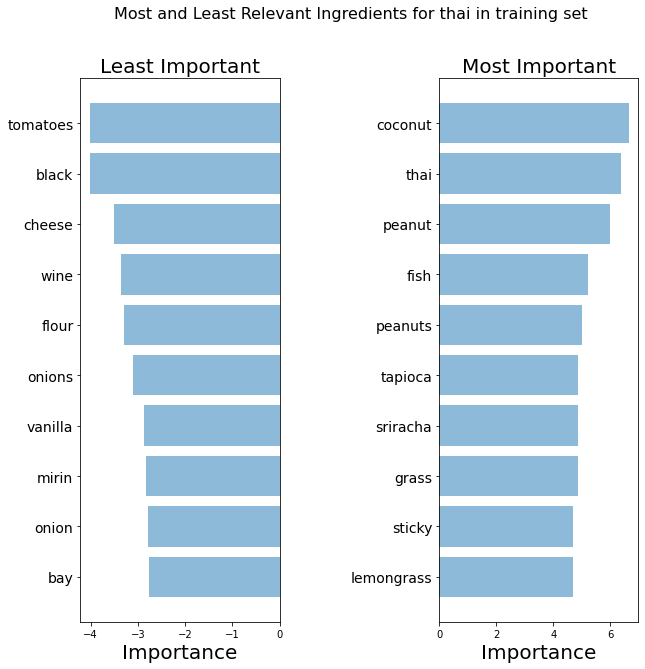

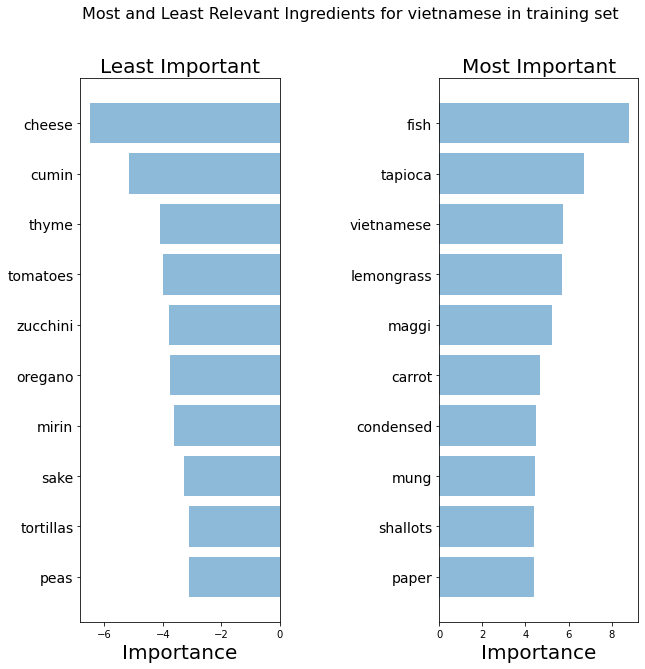

In [50]:
for cuisine in le.classes_:
    train_top_scores = [a[0] for a in train_importance[cuisine]['tops']]
    train_top_words = [a[1] for a in train_importance[cuisine]['tops']]
    train_bottom_scores = [a[0] for a in train_importance[cuisine]['bottom']]
    train_bottom_words = [a[1] for a in train_importance[cuisine]['bottom']]

    plot_important_words(train_top_scores, train_top_words, train_bottom_scores, train_bottom_words, f"Most and Least Relevant Ingredients for {cuisine} in training set")

Brian pointed out that these are already in tokens. Can you flatten the list of lists BUT preserve the original tokens e.g. "olive oil" doesn't get turned into "olive" and "oil"

Oh, the words are individualized to allow lemmatization to work...
Could it be possible to rejoin lemmatized words? Or would it be better to skip lemmatization
    Wait you didn't use a lemmatizer so just try with the original ingredient "tokens"